# TP4 Ciencia de datos - Redes

1. Creación del Grafo
A partir del archivo de datos, genere el grafo de colaboraciones entre autores. Cuente el n´umero de
nodos y aristas. Haga una representación gráfica del grafo.

In [6]:
import matplotlib.pyplot as plt
import csv
import seaborn
import networkx as nx

def get_autores(linea):
    autores = linea[3]
    car = '\/ .~-()`'
    for c in car:
        autores = autores.replace(c, '')
    return autores.upper().split('&')

def add_paper(G, linea):
    autores = get_autores(linea)
    
    for autor in autores:
        G.add_node(autor)
    
    e = 1
    for autor in autores:
        if e < len(autores):
            edges = zip([autor]*(len(autores)-e), autores[e:])
            G.add_edges_from(edges)
        e = e + 1

In [7]:
with open('data.csv', 'r') as data:
    papers = csv.reader(data)
    G = nx.Graph()
    for paper in papers:
        add_paper(G, paper)

cant_nodos = len(list(G.nodes()))
cant_aristas = len(list(G.edges()))
print("Cantidad de nodos: " + str(cant_nodos))
print("Cantidad de aristas: " + str(cant_aristas))

Cantidad de nodos: 3935
Cantidad de aristas: 7820


2. Distribución de Grado
Grafique la distribución del grado de los autores, en escalas lineales, semilogarítmica, y log-log. Argumente,a partir de los gráficos, de qué tipo de distribución se trata. 

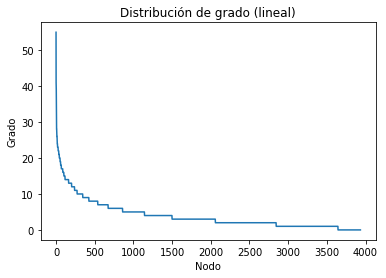

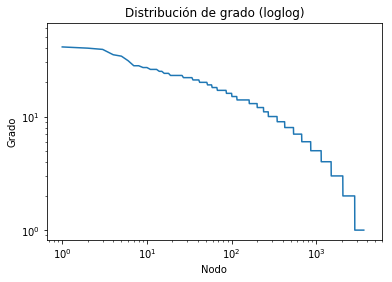

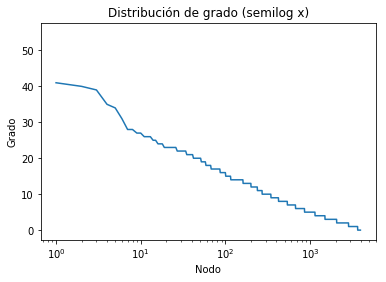

In [8]:
dg = sorted([e[1] for e in list(nx.degree(G))], reverse=True)  

plt.plot(dg)
plt.title('Distribución de grado (lineal)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_lineal.jpg', dpi=300)
#plt.close()
plt.show()

plt.loglog(dg)
plt.title('Distribución de grado (loglog)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_loglog.jpg', dpi=300)
#plt.close()
plt.show()

plt.semilogx(dg)
plt.title('Distribución de grado (semilog x)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_semilogx.jpg', dpi=300)
#plt.close()
plt.show()

Se trata de una distribución exponencial, porque al ser representada en una gráfica semilog en x se comporta de forma aproximadamente lineal. 

3. Componentes Conexas
Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor, o
componente gigante.

In [9]:
ncc = nx.number_connected_components(G)
print("Numero de componentes conexas: " + str(ncc))
    
    # cg es la componente gigante
cg = max(nx.connected_component_subgraphs(G), key=len)
tamcg = len(list(cg.nodes()))
print("Tamaño de la componente gigante: " + str(tamcg))

Numero de componentes conexas: 513
Tamaño de la componente gigante: 3011


4. Tamaños de Vecindades
Trabajando con la componente gigante del grafo, estudie, parándose en un nodo al azar, cómo aumenta
el número de autores alcanzados a medida que se aleja del nodo semilla. Grafique el número de autores
alcanzados en función de la distancia al nodo semilla. Grafique también el número de nuevos autores
que se agregan en cada paso, y estime el máximo de esta función. Pruebe con varios nodos semillas y
analice la robustez de este resultado. Discuta el significado de los gráficos y su relación con el fenómeno
de seis grados de separación.